# Explore mapped fields in Argovis

**Please first run the code with the current settings to familiarize yourself with the notebook: after that, if needed, change the settings and run the notebook again.**

## Setup

In addition to importing a few python packages, make sure to plug in your Argovis API key for API_KEY in the next cell. If you don't have a free Argovis API key yet, get one at https://argovis-keygen.colorado.edu/.

In [2]:
from argovisHelpers import helpers as avh

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt # e.g. to change the size of figures created from functions
import copy

import sys
sys.path.append('./work_in_progress')

from Argovis_tasks_helpers import get_route,list_values_for_parameter_to_api_query,show_variable_names_for_collections
from Argovis_tasks_helpers import get_api_output_formatted_list_1var_for_regions_and_timeranges
from Argovis_tasks_helpers import api_output_formatted_list_1var_plot_map

API_ROOT='https://argovis-api.colorado.edu/'
API_KEY=''

In [3]:
# for a list of collections, please see the Argovis swagger page

#### in the following we set parameters to plot different gridded products
selection_params = {}
#+++ example to use Argo profile data and the glodap gridded product (which provides time mean fields)
selection_params['collections']  = ['timeseries/noaasst',
                                   'timeseries/copernicussla',
                                   'timeseries/ccmpwind',
                                   ]
#+++


In [4]:
# for each selected collection, we list the variables that are available
vars_lists = show_variable_names_for_collections(collections_list=selection_params['collections'],API_KEY=API_KEY,verbose=True)


https://argovis-api.colorado.edu/timeseries/noaasst/vocabulary?parameter=data
>>>>> timeseries/noaasst
['sst']
https://argovis-api.colorado.edu/timeseries/copernicussla/vocabulary?parameter=data
>>>>> timeseries/copernicussla
['sla', 'adt', 'ugosa', 'ugos', 'vgosa', 'vgos']
https://argovis-api.colorado.edu/timeseries/ccmpwind/vocabulary?parameter=data
>>>>> timeseries/ccmpwind
['uwnd', 'vwnd', 'ws', 'nobs']


In [5]:
# indicate the variable of interest for each collection
selection_params['varnames']     = ['sst',
                                    'sla',
                                    'ws',
                                    ]
# let's indicate if we would like to store extra variables in addition to the ones above: 
# points will be returned only if they have (for that collection) the variable indicated
# above AND any variable indicated in data_extra (i.e. for gridded products this is not
# a real constraint as all the variables that are available, are available at all the 
# locations on the grid
# do not forget to include a comma at the start of the string, e.g. ',salinity,temperature'
selection_params['data_extra']   = ['',
                                    ',ugos,vgos',
                                    ',uwnd,vwnd',
                                    ]

selection_params['varname_temperature']     = ['',
                                    '',
                                    '',
                                    ]
selection_params['varname_salinity']     = ['',
                                    '',
                                    '',
                                    ]

In [6]:
for i,ilist in enumerate(vars_lists):
    if selection_params['varnames'][i] not in ilist:
        print('>>>>> '+selection_params['collections'][i]+' does not include selected variable, i.e. '+selection_params['varnames'][i])
        print('Here is a list of the variables that are included:')
        print(ilist)
        change_name_of_selected_variable_before_continuing
    else:
        print('>>>>> '+selection_params['collections'][i]+' includes selected variable, i.e. '+selection_params['varnames'][i])

>>>>> timeseries/noaasst includes selected variable, i.e. sst
>>>>> timeseries/copernicussla includes selected variable, i.e. sla
>>>>> timeseries/ccmpwind includes selected variable, i.e. ws


In [7]:
# for each collection, we show the time period of interest
# (please note that this code will be updated in the near future to leverage upcoming summary documemnts for each collection; at that point, the information of interest will be accessed in the same way for all the collections)
for icollection in selection_params['collections']:
    metaQuery = {'id': icollection.split('/')[1]}
    print('--> '+icollection)
    meta = avh.query(icollection.split('/')[0]+'/meta', options=metaQuery, apikey=API_KEY, apiroot=get_route(icollection),verbose=True)
    
    try:
        for imeta in meta:
            if 'timeseries' in imeta.keys():
                print('Time period available:')
                print(imeta['timeseries'][0])
                print(imeta['timeseries'][-1])
    except:
        # this is a temporary fix and only works for grids/
        options = {'box': [[-60,27],[-59, 28]]}
        bfr     = avh.query(icollection, options=options, apikey=API_KEY, apiroot=get_route(icollection),verbose=False)
        bfr_time= [x['timestamp'] for x in bfr]
        print('Time period available:')
        print(min(bfr_time))
        print(max(bfr_time))
        

--> timeseries/noaasst
https://argovis-api.colorado.edu/timeseries/meta?id=noaasst
Time period available:
1989-12-31T00:00:00.000Z
2023-01-29T00:00:00.000Z
--> timeseries/copernicussla
https://argovis-api.colorado.edu/timeseries/meta?id=copernicussla
Time period available:
1993-01-03T00:00:00.000Z
2022-07-24T00:00:00.000Z
--> timeseries/ccmpwind
https://argovis-api.colorado.edu/timeseries/meta?id=ccmpwind
Time period available:
1993-01-03T00:00:00.000Z
2019-12-29T00:00:00.000Z


In [8]:
#### params varying with the region

# in this example, we will use the 'box' selection type (i.e. we query the data within boxes),
# hence we indicate here the bottom/left and top/right vertices for each box of interest... 
# the other option is to search in a 'polygon' and indicate the polygon
# vertices in a list (first and last vertex should be the same)
selection_params['regions']     = [
                        [[-55.5,35.5],[-45.5,40.5]],
                        ]
selection_params['regions_type'] = ['box', 'box']

selection_params['regions_tag'] = ['Atlantic','Pacific',]
####

In [9]:
# list of startDate and endDates of interest (note: these will not be used for glodap as glodap only provides a time mean)
selection_params['startDate']    = ['2018-01-01T00:00:00Z']
selection_params['endDate']      = ['2018-01-17T00:00:00Z']

# colors to use for the line plots
colors = list(mcolors.TABLEAU_COLORS.keys())

In [10]:
# let's retrieve the data of interest
api_output_formatted_list = get_api_output_formatted_list_1var_for_regions_and_timeranges(selection_params=selection_params,API_KEY=API_KEY)


>>>>>>>>> timeseries/noaasst sst, Atlantic 2018-01-01 to 2018-01-17
https://argovis-api.colorado.edu/timeseries/noaasst?data=sst&box=[[-55.5,+35.5],+[-45.5,+40.5]]&startDate=2018-01-01T00:00:00Z&endDate=2018-01-17T00:00:00Z
Here is the info returned for timeseries/noaasst (if you would like to store more parameters, please include more in selection_params[additional_info_to_save]):
dict_keys(['_id', 'metadata', 'basin', 'geolocation', 'data', 'data_info', 'timeseries'])
https://argovis-api.colorado.edu/timeseries/meta?id=noaasst
>>>>>>>>> timeseries/copernicussla sla, Atlantic 2018-01-01 to 2018-01-17
https://argovis-api.colorado.edu/timeseries/copernicussla?data=sla,ugos,vgos&box=[[-55.5,+35.5],+[-45.5,+40.5]]&startDate=2018-01-01T00:00:00Z&endDate=2018-01-17T00:00:00Z
Here is the info returned for timeseries/copernicussla (if you would like to store more parameters, please include more in selection_params[additional_info_to_save]):
dict_keys(['_id', 'metadata', 'basin', 'geolocation'

In [11]:
print(api_output_formatted_list[0].keys())

api_output_formatted_list[0][list(api_output_formatted_list[0].keys())[0]]

dict_keys(['sst'])


{'collection': 'timeseries/noaasst',
 'varname': 'sst',
 'varname_temperature': '',
 'varname_salinity': '',
 'data_units': 'degC',
 'data_xarray': <xarray.Dataset>
 Dimensions:    (latitude: 6, longitude: 11, levels: 1, timestamp: 2)
 Coordinates:
   * latitude   (latitude) float64 35.5 36.5 37.5 38.5 39.5 40.5
   * longitude  (longitude) float64 304.5 305.5 306.5 307.5 ... 312.5 313.5 314.5
   * levels     (levels) int64 0
   * timestamp  (timestamp) object '2018-01-07T00:00:00.000Z' '2018-01-14T00:0...
 Data variables:
     data       (latitude, longitude, levels, timestamp) float64 20.6 ... 19.16,
 'region': [[-55.5, 35.5], [-45.5, 40.5]],
 'startDate': '2018-01-01T00:00:00Z',
 'endDate': '2018-01-17T00:00:00Z',
 'region_type': 'box',
 'region_tag': 'Atlantic',
 'varname_title': 'Sst'}

In [12]:
# for i in api_output_formatted_list:
#     for j in i.keys():
#         print(i[j]['data_xarray'])
#         print(i[j]['data_units'])

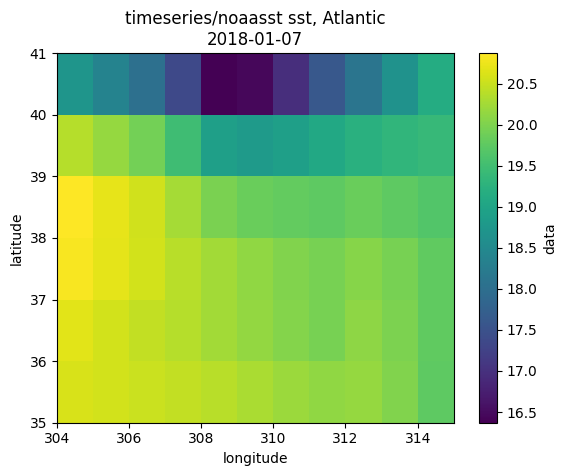

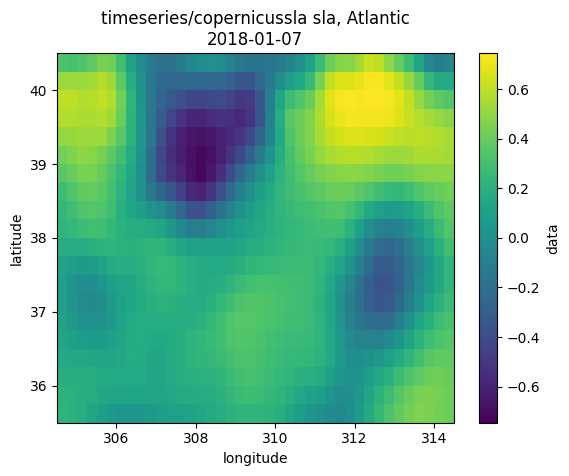

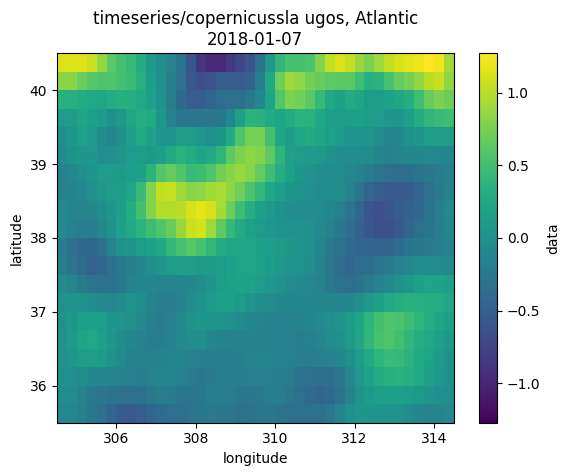

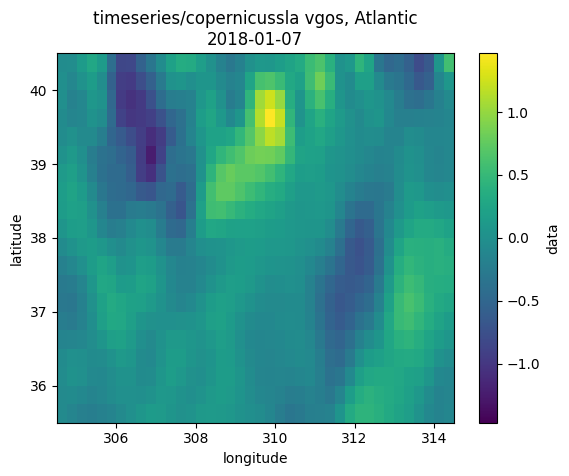

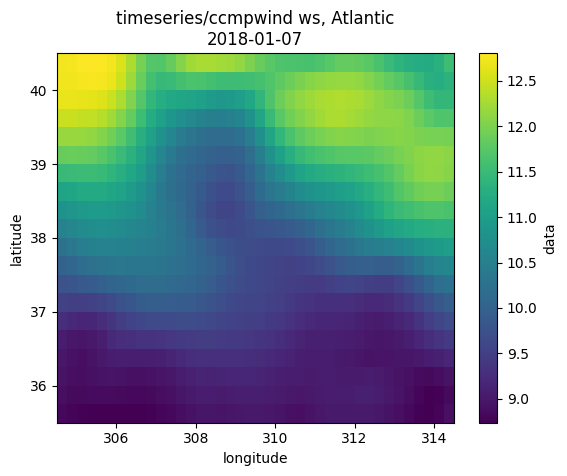

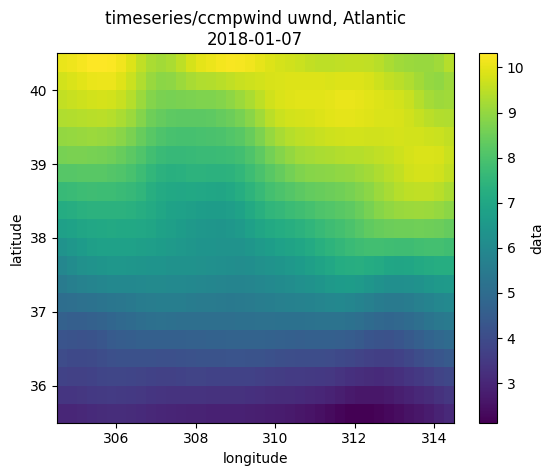

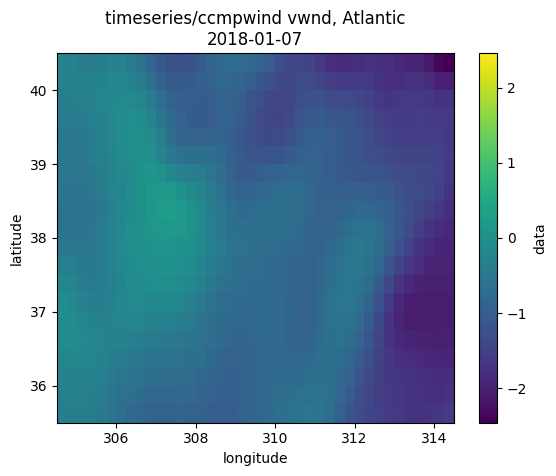

In [13]:
# for each product, plot the first time step for the first level
api_output_formatted_list_1var_plot_map(api_output_formatted_list,ilev=0,itime=0)  


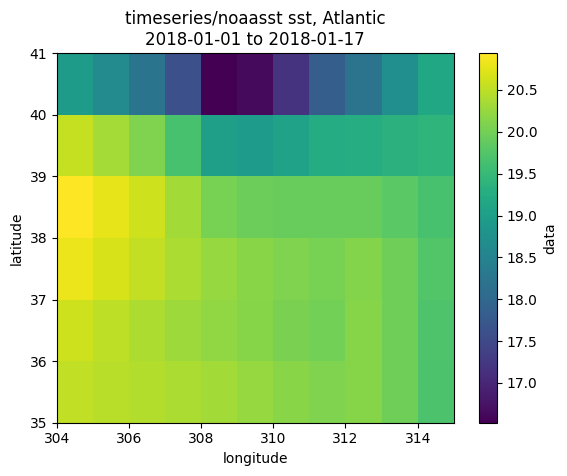

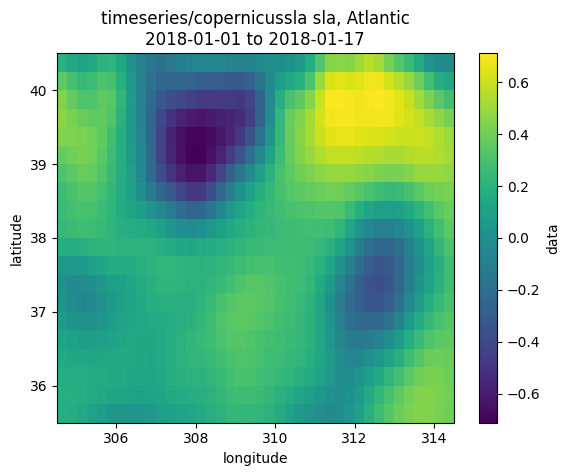

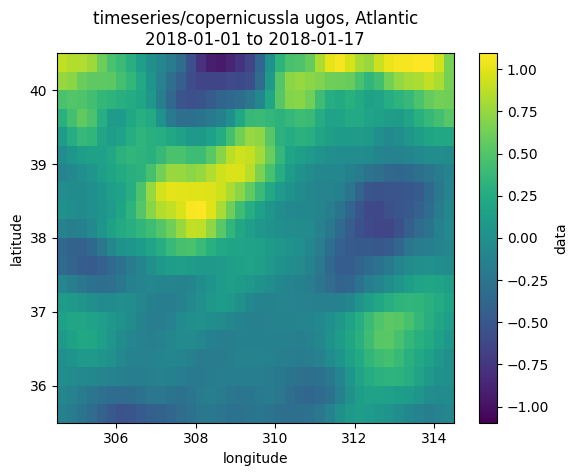

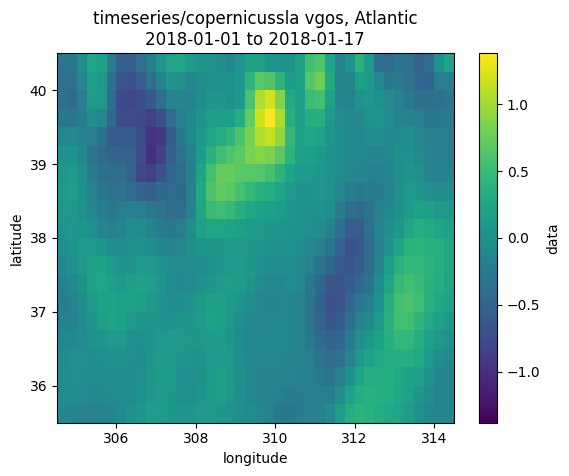

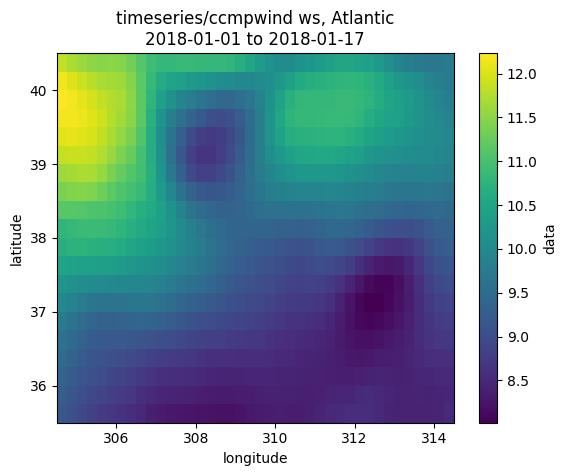

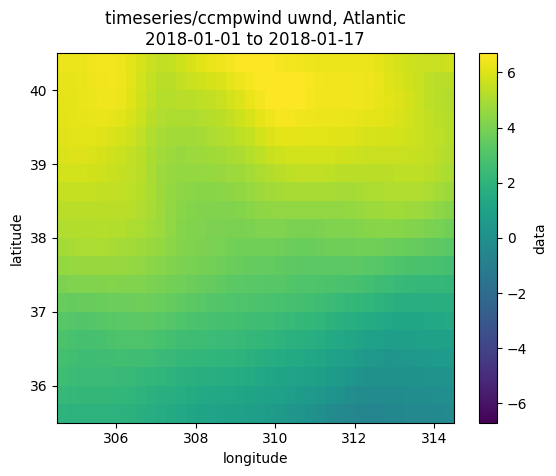

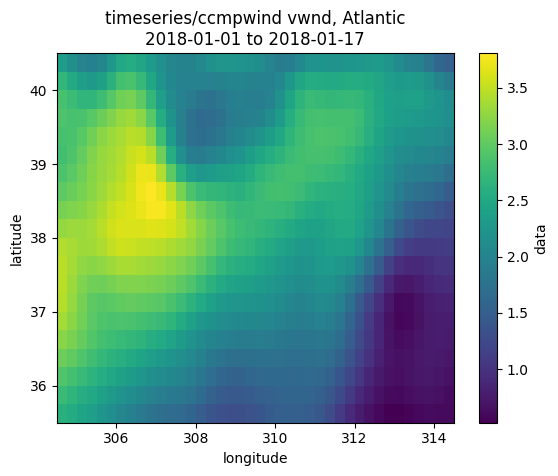

In [14]:
# plot the time mean for the first level
api_output_formatted_list_1var_plot_map(api_output_formatted_list,ilev=0,itime=[])  


In [14]:
# other options not yet included:
# for each collection, indicate the colormap to use, and use it in the maps